# Loading Dataset

In [6]:
import glob
import tensorflow
from PIL import Image
import os
import numpy as np
def load_labels(myDir):
    labels=[]
    fileList = glob.glob(myDir)
    for fname in fileList:
        fileName = os.path.basename(fname)
        curLabel = fileName.split("-")[0]
        labels.append(curLabel)
    return np.asarray(labels)
        

def load_data(myDir):
    fileList = glob.glob(myDir)    
    x = np.array([np.array(Image.open(fname)).flatten() for fname in fileList])
    x=x/255
    return x

myDir ="train/*.png"
v_labels = load_labels(myDir)
v_data = load_data(myDir)



In [7]:
def load_labels(myDir1):
    labels=[]
    fileList = glob.glob(myDir1)
    for fname in fileList:
        fileName = os.path.basename(fname)
        curLabel = fileName.split("-")[0]
        labels.append(curLabel)
    return np.asarray(labels)
        

def load_data(myDir1):
    fileList = glob.glob(myDir1)    
    x = np.array([np.array(Image.open(fname)).flatten() for fname in fileList])
    x=x/255
    return x

myDir1 ="valid/*.png"
test_labels = load_labels(myDir1)
test_data = load_data(myDir1)


In [8]:
def load_labels(myDir1):
    labels=[]
    fileList = glob.glob(myDir1)
    for fname in fileList:
        fileName = os.path.basename(fname)
        curLabel = fileName.split("-")[0]
        labels.append(curLabel)
    return np.asarray(labels)
        

def load_data(myDir1):
    fileList = glob.glob(myDir1)    
    x = np.array([np.array(Image.open(fname)).flatten() for fname in fileList])
    x=x/255
    return x

myDir1 ="eval/*.png"
train_labels = load_labels(myDir1)
train_data = load_data(myDir1)

# Performing One Hot Encoding (Converting Labels in Binary Format)

In [9]:
from tensorflow.keras.utils import to_categorical
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)
v_labels=to_categorical(v_labels)

In [60]:
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Data Size for training, validation and testing

In [12]:
print(train_data.shape,test_data.shape,v_data.shape)
print(train_labels.shape,test_labels.shape,v_labels.shape)

(21780, 784) (7000, 784) (7000, 784)
(21780, 10) (7000, 10) (7000, 10)


# Building Model Architecture

In [47]:
model=models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Model Configuration

In [48]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training

In [49]:
history=model.fit(train_data, train_labels, epochs=8, batch_size=12,verbose=1, validation_data=[v_data, v_labels])

Train on 21780 samples, validate on 7000 samples
Epoch 1/8
21780/21780 [==============================] - 29s 1ms/sample - loss: 1.3431 - accuracy: 0.5309 - val_loss: 0.7899 - val_accuracy: 0.7401
Epoch 2/8
21780/21780 [==============================] - 27s 1ms/sample - loss: 0.8442 - accuracy: 0.7201 - val_loss: 0.7957 - val_accuracy: 0.7577
Epoch 3/8
21780/21780 [==============================] - 27s 1ms/sample - loss: 0.7385 - accuracy: 0.7601 - val_loss: 0.8795 - val_accuracy: 0.7390
Epoch 4/8
21780/21780 [==============================] - 27s 1ms/sample - loss: 0.6970 - accuracy: 0.7781 - val_loss: 0.8250 - val_accuracy: 0.7807
Epoch 5/8
21780/21780 [==============================] - 27s 1ms/sample - loss: 0.6717 - accuracy: 0.7854 - val_loss: 0.7929 - val_accuracy: 0.7951
Epoch 6/8
21780/21780 [==============================] - 28s 1ms/sample - loss: 0.6650 - accuracy: 0.7877 - val_loss: 0.8533 - val_accuracy: 0.7781
Epoch 7/8
21780/21780 [==============================] - 28s 1m

# Model Testing

In [53]:
loss, accuracy=model.evaluate(test_data, test_labels)

7000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# Checking Model Prediction

Predicted Output= 0


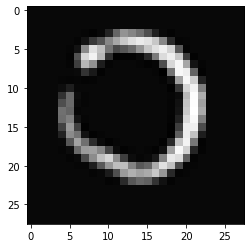

In [70]:
index=10
plt.imshow(test_data[index].reshape(28,28), cmap='Greys')
result=model.predict(test_data[index].reshape(1,784))
print("Predicted Output=",result.argmax())

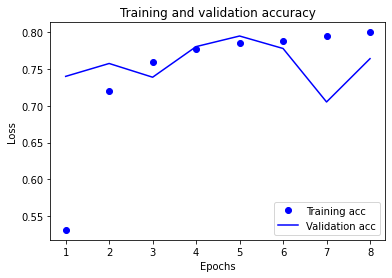

In [84]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('acc')
plt.show()


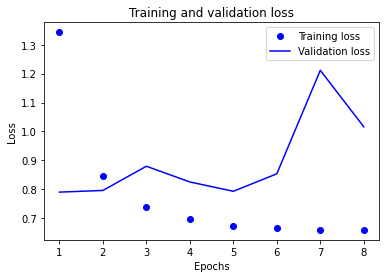

In [85]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss')
plt.show()